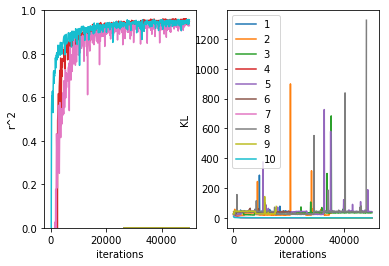

EFN1
R2s [  0.                  nan -16.01167389   0.95021734 -19.8822452
   0.           0.92946094          nan   0.           0.95650536]
KLs [ 0.                 nan 35.07999793  0.41916518 41.68995882  0.
  0.48723604         nan  0.          0.42481703]


In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from efn_util import get_flowdict, get_flowstring

exp_fam = 'dirichlet';
give_hint = False;
D = 50;
K = 100;
M = 1000;
planar_flows = max(D, 20);
flow_dict = get_flowdict(0, 0, 0, planar_flows, 0, 0);
flowstring = get_flowstring(flow_dict);
if (exp_fam == 'dirichlet'):
    D_Z = D-1;
else:
    D_Z = D;
    
L = max(int(np.ceil(np.sqrt(D_Z))), 4);
rs = 0;


if (give_hint):
    give_inv_str = 'giveInv_';
else:
    give_inv_str = '';
    
datadir = '/Users/sbittner/Documents/efn/results/Fig3/';

num_models = 10;
EFN1_R2_final = np.zeros((num_models,));
EFN1_KL_final = np.zeros((num_models,));
plt.figure();
for rs in range(num_models):
    fname = datadir + 'EFN1/EFN_%s_fixedEta_%sD=%d_K=%d_M=%d_flow=%s_L=%d_rs=%d/results.npz' \
                                      % (exp_fam, give_inv_str, D, 1, M, flowstring, L, rs+1);
    npzfile = np.load(fname);
    R2s = npzfile['train_R2s'];
    KLs = npzfile['train_KLs'];
    num_checks = KLs.shape[0];
    check_rate = npzfile['check_rate'];
    max_iters = check_rate*num_checks;
    its = np.arange(check_rate, max_iters+1, check_rate);
    plt.subplot(1,2,1);
    plt.plot(its, R2s[:,0]);
    if (rs==0):
        plt.xlabel('iterations');
        plt.ylabel('r^2');
        plt.ylim([0, 1]);
    plt.subplot(1,2,2);
    plt.plot(its, KLs[:,0]);
    if (rs==0):
        plt.xlabel('iterations');
        plt.ylabel('KL');
    
    EFN1_R2_final[rs] = R2s[-1,0];
    EFN1_KL_final[rs] = KLs[-1,0];
plt.legend(range(1,11));
plt.show();

print('EFN1');
print('R2s', EFN1_R2_final);
print('KLs', EFN1_KL_final);

NF1
Final R2s [0.60235627 0.53184442 0.51117914 0.52049471 0.49313421 0.56278842
 0.51523276 0.40812123 0.49683393 0.59001899]
Final KLs [3.29827911 2.89049398 2.99379562 3.00428461 3.27553604 2.7545428
 2.82983289 3.49723365 3.66373132 3.08364827]


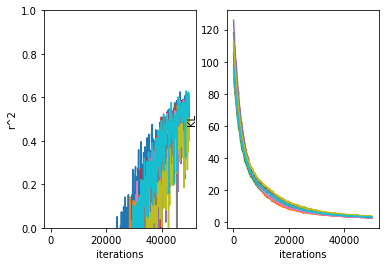

In [78]:
NF1_R2_final = np.zeros((num_models,));
NF1_KL_final = np.zeros((num_models,));

plt.figure();
for rs in range(num_models):
    fname = datadir + 'NF1/NF1_%s_D=%d_flow=%s_rs=%d/results.npz' \
                      % (exp_fam, D, flowstring, rs+1);
    npzfile = np.load(fname);
    R2s = npzfile['train_R2s'];
    KLs = npzfile['train_KLs'];
    num_checks = KLs.shape[0];
    check_rate = npzfile['check_rate'];
    max_iters = check_rate*num_checks;
    its = np.arange(check_rate, max_iters+1, check_rate);
    plt.subplot(1,2,1);
    plt.plot(its, R2s[:,0]);
    if (rs==0):
        plt.xlabel('iterations');
        plt.ylabel('r^2');
        plt.ylim([0, 1]);
    plt.subplot(1,2,2);
    plt.plot(its, KLs[:,0]);
    if (rs==0):
        plt.xlabel('iterations');
        plt.ylabel('KL');
        
    NF1_R2_final[rs] = R2s[-1,0];
    NF1_KL_final[rs] = KLs[-1,0];
    
print('NF1');
print('Final R2s', NF1_R2_final);
print('Final KLs', NF1_KL_final);
plt.show();

In [69]:
print(KLs.shape);

(500, 1)


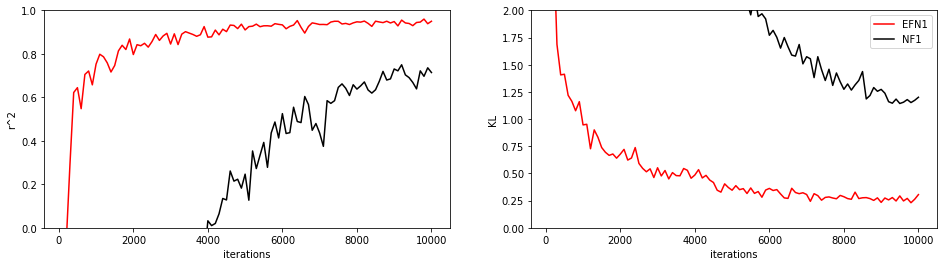

EFN1
R2s [0.89514165 0.89514165 0.89514165 0.89514165 0.96808534 0.97390633
 0.95196494        nan 0.97220903 0.97496387]
KLs [0.45596851 0.45596851 0.45596851 0.45596851 0.11930127 0.0789013
 0.17544235        nan 0.13027079 0.13216328]


In [72]:
colors = ['k', 'b', 'r', 'g'];
num_models = 1;
figsize = (16, 4*num_models);
plt.figure(figsize=figsize);
max_iters = 10000;
for rs in range(num_models):
    # load EFN1
    fname = datadir + 'EFN1/EFN_%s_fixedEta_%sD=%d_K=%d_M=%d_flow=%s_L=%d_rs=%d/results.npz' \
                                      % (exp_fam, give_inv_str, D, 1, M, flowstring, L, rs+1);
    EFN1_npzfile = np.load(fname);
    EFN1_R2s = EFN1_npzfile['train_R2s'];
    EFN1_KLs = EFN1_npzfile['train_KLs'];
    num_checks = EFN1_KLs.shape[0];
    check_rate = npzfile['check_rate'];
    #max_iters = check_rate*num_checks;
    its = np.arange(check_rate, max_iters+1, check_rate);
    num_its = its.shape[0];
    
    # load NF file
    fname = datadir + 'NF1/NF1_%s_D=%d_flow=%s_rs=%d/results.npz' \
                      % (exp_fam, D, flowstring, rs+1);
    NF1_npzfile = np.load(fname);
    NF1_R2s = NF1_npzfile['train_R2s'];
    NF1_KLs = NF1_npzfile['train_KLs'];
    
    # plot R2s
    plt.subplot(num_models,2,2*rs+1);
    plt.plot(its, EFN1_R2s[:num_its,0], 'r-');
    plt.plot(its, NF1_R2s[:num_its,0], 'k-');
    if (rs==(num_models-1)):
        plt.xlabel('iterations');
    plt.ylabel('r^2');
    plt.ylim([0, 1]);
    
    # plot KLs
    plt.subplot(num_models,2,2*(rs+1));
    plt.plot(its, EFN1_KLs[:num_its,0], 'r-');
    plt.plot(its, NF1_KLs[:num_its,0], 'k-');
    plt.legend(['EFN1', 'NF1']);
    if (rs==(num_models-1)):
        plt.xlabel('iterations');
    plt.ylabel('KL');
    plt.ylim([0, 2]);
    
    
    EFN1_R2_final[rs] = R2s[-1,0];
    EFN1_KL_final[rs] = KLs[-1,0];
    
plt.legend(['EFN1', 'NF1']);
plt.show();

print('EFN1');
print('R2s', EFN1_R2_final);
print('KLs', EFN1_KL_final);

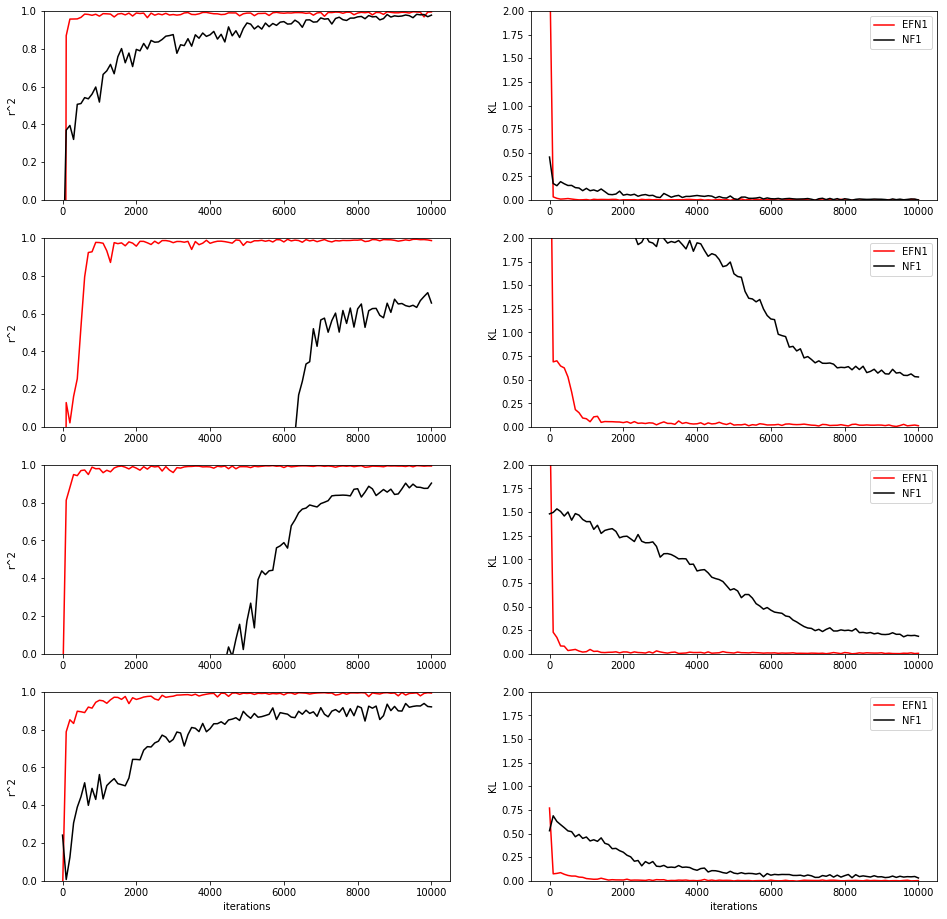

In [76]:
exp_fam = 'dirichlet';
give_hint = False;
D = 3;
K = 100;
M = 1000;
planar_flows = D;
flow_dict = get_flowdict(0, 0, 0, planar_flows, 0, 0);
flowstring = get_flowstring(flow_dict);
if (exp_fam == 'dirichlet'):
    D_Z = D-1;
else:
    D_Z = D;
    
L = max(int(np.ceil(np.sqrt(D_Z))), 4);
rs = 0;


if (give_hint):
    give_inv_str = 'giveInv_';
else:
    give_inv_str = '';
    

datadir = '/Users/sbittner/Documents/efn/scripts/results/MK/tb/';
num_models = 4;
figsize = (16, 4*num_models);
plt.figure(figsize=figsize);
max_iters = 10000;
for rs in range(num_models):
    # load EFN1
    fname = datadir + 'EFN_%s_fixedEta_%sD=%d_K=%d_M=%d_flow=%s_L=%d_rs=%d/results.npz' \
                                      % (exp_fam, give_inv_str, D, 1, M, flowstring, L, rs);
    EFN1_npzfile = np.load(fname);
    EFN1_R2s = EFN1_npzfile['train_R2s'];
    EFN1_KLs = EFN1_npzfile['train_KLs'];
    num_checks = EFN1_KLs.shape[0];
    check_rate = npzfile['check_rate'];
    #max_iters = check_rate*num_checks;
    its = np.arange(0, max_iters+1, check_rate);
    num_its = its.shape[0];
    
    # load NF file
    fname = datadir + 'NF1_%s_D=%d_flow=%s_rs=%d/results.npz' \
                      % (exp_fam, D, flowstring, rs);
    NF1_npzfile = np.load(fname);
    NF1_R2s = NF1_npzfile['train_R2s'];
    NF1_KLs = NF1_npzfile['train_KLs'];
    
    # plot R2s
    plt.subplot(num_models,2,2*rs+1);
    plt.plot(its, EFN1_R2s[:num_its,0], 'r-');
    plt.plot(its, NF1_R2s[:num_its,0], 'k-');
    if (rs==(num_models-1)):
        plt.xlabel('iterations');
    plt.ylabel('r^2');
    plt.ylim([0, 1]);
    
    # plot KLs
    plt.subplot(num_models,2,2*(rs+1));
    plt.plot(its, EFN1_KLs[:num_its,0], 'r-');
    plt.plot(its, NF1_KLs[:num_its,0], 'k-');
    plt.legend(['EFN1', 'NF1']);
    if (rs==(num_models-1)):
        plt.xlabel('iterations');
    plt.ylabel('KL');
    plt.ylim([0, 2]);
    
    
    EFN1_R2_final[rs] = R2s[-1,0];
    EFN1_KL_final[rs] = KLs[-1,0];
    
plt.show();
